In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [3]:
df=pd.read_csv("AIML Dataset.csv")

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [8]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [9]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
df.shape

(6362620, 11)

In [11]:
round((df["isFraud"].value_counts()[1]/df.shape[0])*100,2)

0.13

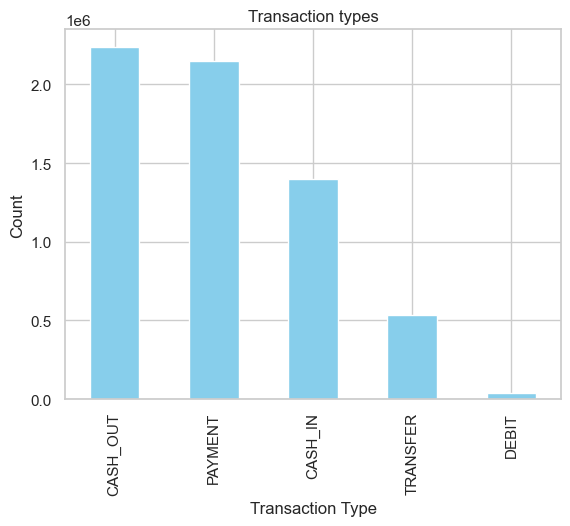

In [12]:
df["type"].value_counts().plot(kind="bar",title="Transaction types",color="skyblue")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

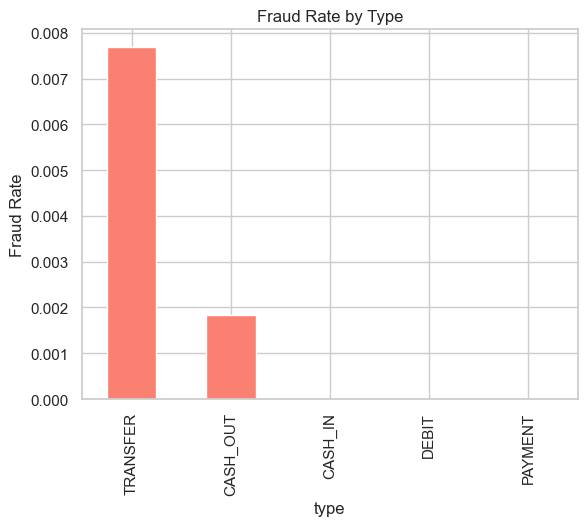

In [14]:
fraud_by_type=df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar",title="Fraud Rate by Type",color="salmon")
plt.ylabel("Fraud Rate")
plt.show()

In [15]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int32

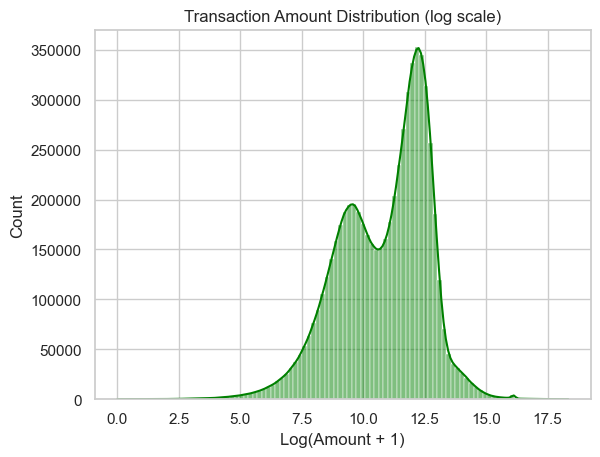

In [16]:
sns.histplot(np.log1p(df["amount"]),bins=100,kde=True,color="green")
plt.title("Transaction Amount Distribution (log scale)")
plt.xlabel("Log(Amount + 1)")
plt.show()

In [ ]:
sns.boxplot(data=df[df["amount"]<5000],x="isFraud",y="amount")
plt.title("Amount vs isFraud (Filtered under 50k)")
plt.show()

In [ ]:
df.columns

In [ ]:
df["balanceDiffOrig"]=df["oldbalanceOrg"]-df["newbalanceOrig"]
df["balanceDiffDest"]=df["newbalanceDest"]-df["oldbalanceDest"]

In [ ]:
(df["balanceDiffDest"]<0).sum()

In [ ]:
frauds_per_step=df[df["isFraud"]==1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index,frauds_per_step.values,label="Frauds per Step")
plt.xlabel("Step(Time)")
plt.ylabel("Number of Frauds")
plt.title("Frauds Over Time")
plt.grid(True)
plt.show()

In [ ]:
df.drop(columns="step",inplace=True)

In [ ]:
df.head()

In [ ]:
top_senders=df["nameOrig"].value_counts().head(10)

In [ ]:
top_senders

In [ ]:
top_receivers=df["nameDest"].value_counts().head(10)
top_receivers

In [ ]:
fraud_users=df[df["isFraud"]==1]["nameOrig"].value_counts().head(10)
fraud_users

In [ ]:
fraud_types=df[df["type"].isin(["TRANSFER","CASH_OUT"])]
fraud_types["type"].value_counts

In [ ]:
sns.countplot(data=fraud_types,x="type",hue="isFraud")
plt.title("Fraud Distributio in Transfer and Cash_Out")
plt.show()

In [ ]:
corr=df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]].corr()
corr

In [ ]:
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
zero_after_transfer=df[
    (df["oldbalanceOrg"]>0) &
    (df["newbalanceOrig"]==0) &
    (df["type"].isin(["TRANSFER","CASH_OUT"]))
]

In [ ]:
len(zero_after_transfer)

In [ ]:
zero_after_transfer.head()

In [ ]:
df["isFraud"].value_counts()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df.head()

In [ ]:
df_model=df.drop(["nameOrig","nameDest","isFlaggedFraud"],axis=1)
df_model.head()

In [ ]:
categorical=["type"]
numeric=["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]

In [ ]:
y=df_model["isFraud"]
X=df_model.drop("isFraud",axis=1)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y)

In [ ]:
preprocessor=ColumnTransformer(
    transformers=[
        ("num",StandardScaler(),numeric),
        ("cat",OneHotEncoder(drop="first"),categorical)
    ],
    remainder="drop"

)

In [ ]:
pipeline=Pipeline([
    ("prep",preprocessor),
    ("clf",LogisticRegression(class_weight="balanced",max_iter=1000))
])

In [ ]:
pipeline.fit(X_train,y_train)

In [ ]:
y_pred=pipeline.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
pipeline.score(X_test,y_test)*100

In [ ]:
import joblib 
joblib.dump(pipeline,"fraud_detection_pipeline.pkl")

In [ ]:
import joblib 
joblib.dump(pipeline,"fraud_detection_pipeline")

In [ ]:
model=joblib.load("fraud_detection_pipeline")

In [ ]:
input_data=pd.DataFrame([{
    "type": "PAYMENT",
    "amount" :9839.64,
    "oldbalanceOrg":170136.0,
    "newbalanceOrig":160296.36,
    "oldbalanceDest": 0.0,
    "newbalanceDest":0.0
}])

				

In [ ]:
prediction=model.predict(input_data)[0]

In [ ]:
if prediction ==1:
    print("This transaction can be fraud")

else:
    print("This transaction doesn't seem like fraud")


In [17]:
from tkinter import *
import joblib
import pandas as pd

# Load the trained model
model = joblib.load("fraud_detection_pipeline")

# Function to predict fraud
def predict_fraud():
    try:
        # Collect input values
        t_type = type_var.get()
        amount = float(e1.get())
        oldbalanceOrg = float(e2.get())
        newbalanceOrig = float(e3.get())
        oldbalanceDest = float(e4.get())
        newbalanceDest = float(e5.get())

        # Prepare input as a DataFrame
        input_data = pd.DataFrame([{
            "type": t_type,
            "amount": amount,
            "oldbalanceOrg": oldbalanceOrg,
            "newbalanceOrig": newbalanceOrig,
            "oldbalanceDest": oldbalanceDest,
            "newbalanceDest": newbalanceDest
        }])

        # Predict
        prediction = model.predict(input_data)[0]

        # Display result
        if prediction == 1:
            result_label.config(text="⚠️ This transaction can be FRAUD!", fg="red")
        else:
            result_label.config(text="✅ This transaction seems SAFE.", fg="green")

    except ValueError:
        result_label.config(text="Please enter valid numeric values!", fg="red")


# Function to clear all fields
def clear_fields():
    e1.delete(0, END)
    e2.delete(0, END)
    e3.delete(0, END)
    e4.delete(0, END)
    e5.delete(0, END)
    type_var.set("PAYMENT")
    result_label.config(text="")


# Main window setup
master = Tk()
master.title("Transaction Fraud Detection System")
master.geometry("550x500")
master.configure(bg="#f4f4f4")

# Title
Label(master, text="💳 Transaction Fraud Detection System", bg="black", fg="white",
      font=("Arial", 16, "bold"), pady=10).grid(row=0, columnspan=2, pady=10)

# Dropdown for transaction type
Label(master, text="Transaction Type:", bg="#f4f4f4", font=("Arial", 11, "bold")).grid(row=1, sticky=W, padx=10, pady=5)
type_var = StringVar(master)
type_var.set("PAYMENT")  # default
OptionMenu(master, type_var, "PAYMENT", "TRANSFER", "CASH_OUT", "DEBIT", "CASH_IN").grid(row=1, column=1, padx=10, pady=5)

# Labels
Label(master, text="Amount:", bg="#f4f4f4").grid(row=2, sticky=W, padx=10, pady=5)
Label(master, text="Old Balance (Sender):", bg="#f4f4f4").grid(row=3, sticky=W, padx=10, pady=5)
Label(master, text="New Balance (Sender):", bg="#f4f4f4").grid(row=4, sticky=W, padx=10, pady=5)
Label(master, text="Old Balance (Receiver):", bg="#f4f4f4").grid(row=5, sticky=W, padx=10, pady=5)
Label(master, text="New Balance (Receiver):", bg="#f4f4f4").grid(row=6, sticky=W, padx=10, pady=5)

# Entries
e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)

e1.grid(row=2, column=1, padx=10)
e2.grid(row=3, column=1, padx=10)
e3.grid(row=4, column=1, padx=10)
e4.grid(row=5, column=1, padx=10)
e5.grid(row=6, column=1, padx=10)

# Buttons
Button(master, text="Predict", bg="green", fg="white", font=("Arial", 12, "bold"),
       command=predict_fraud).grid(row=8, column=1, pady=15)
Button(master, text="Clear", bg="gray", fg="white", font=("Arial", 12, "bold"),
       command=clear_fields).grid(row=8, column=0, pady=15)

# Result Label
result_label = Label(master, text="", font=("Arial", 13, "bold"), bg="#f4f4f4")
result_label.grid(row=9, column=1, pady=15)

master.mainloop()
